In [1]:
import numpy as np
from path import Path
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import os
import sys
import cv2
sys.path.append('../')
import random
from tool.data_io import get_data_paths,read_image, read_json, save_image, try_create_dir,save_json
from tool.yaml_io import write_to_yaml,read_from_yaml
from tool.plt_utils import plt_samples

In [2]:
def set_labels(label_file):
    labels = read_json(label_file)
    label_ids = set()
    label_names = set()
    for species in labels.keys():
        for (idx, item) in labels[species].items():
            label_ids.add(item['number'])
            label_names.add(item['label'])
    return labels

In [30]:
species_type = 'quercus-bicolor-herbivory'
d_type = 'hole'
root = Path('/usr/xtmp/xs75/leaves/datasets/damage_info/damages/')
d_sizes = []
d_deleted = []
d_keep = []
bound = 500
for path in tqdm(glob(root/f'{d_type}/{species_type}/*/*.jpeg')):
    d, _ = read_image(path)
    d_pixels = d.shape[0]*d.shape[1]
    d_sizes += [d_pixels]
d_sizes = np.array(d_sizes)
d_keep = d_sizes[d_sizes >= bound]
d_deleted = d_sizes[d_sizes < bound]

100%|██████████| 5119/5119 [00:01<00:00, 2905.19it/s]


In [31]:
sum(d_keep)

12630840

In [32]:
sum(d_deleted)

533314

(array([97., 54., 20., 26., 14., 13.,  1.,  7.,  2.,  5.,  4.,  2.,  2.,
         0.,  2.,  1.,  2.,  1.,  0.,  2.,  0.,  2.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 10043.  ,  15150.34,  20257.68,  25365.02,  30472.36,  35579.7 ,
         40687.04,  45794.38,  50901.72,  56009.06,  61116.4 ,  66223.74,
         71331.08,  76438.42,  81545.76,  86653.1 ,  91760.44,  96867.78,
        101975.12, 107082.46, 112189.8 , 117297.14, 122404.48, 127511.82,
        132619.16, 137726.5 , 142833.84, 147941.18, 153048.52, 158155.86,
        163263.2 , 168370.54, 173477.88, 178585.22, 183692.56, 188799.9 ,
        193907.24, 199014.58, 204121.92, 209229.26, 214336.6 , 219443.94,
        224551.28, 229658.62, 234765.96, 239873.3 , 244980.64, 250087.98,
        255195.32, 260302.66, 265410.  ]),
 <BarContainer object of 50 artists>)

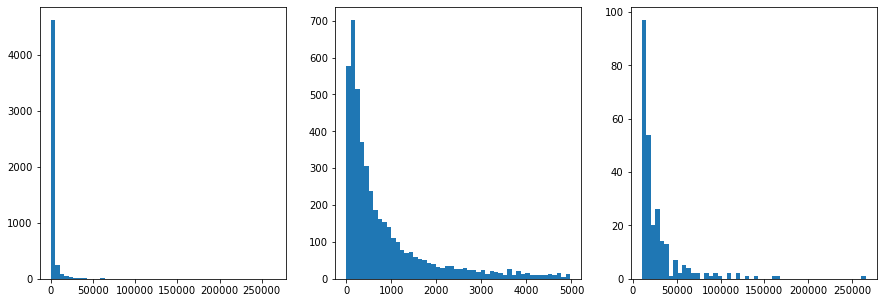

In [35]:
n_r = 1
n_c = 3
plt.figure(figsize = (15,5))
plt.subplot(n_r, n_c, 1)
plt.hist(d_sizes, 50, density = False, histtype ='bar')
plt.subplot(n_r, n_c, 2)
plt.hist(d_sizes[d_sizes < 5000], 50, density = False, histtype ='bar')
plt.subplot(n_r, n_c, 3)
plt.hist(d_sizes[d_sizes >= 10000], 50, density = False, histtype ='bar')